# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

In [79]:
# mount google drive in to your Colab enviornment
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
cd /content/drive/MyDrive/AI_assignment/


A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [5]:
import pandas as pd
import numpy as np
car_data = pd.read_csv('CarPrice_Assignment.csv')

In [7]:
import tensorflow as tf

In [8]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
car_data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [10]:
#check if there are empty cells, if there are then row and column indexes will be returned where values are empty or missing
np.where(car_data.applymap(lambda x: x ==''))

(array([], dtype=int64), array([], dtype=int64))

In [11]:
car_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
# correct the name error in audi 100 ls
car_data.iloc[3,2] = 'audi 100ls'

In [13]:
car_data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [14]:
car_data.drop(columns=['car_ID'], inplace = True)

In [15]:
# get columns so that we can use the column names for onehot encoding of catagorical featrues in next cell
car_data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [16]:
# onehot encode all catagorical columns
f_car = pd.get_dummies(car_data, columns=['CarName','symboling','fueltype',	'aspiration',	'doornumber',	'carbody',	'drivewheel',	'enginelocation',	'enginetype',	'cylindernumber',	'fuelsystem'], drop_first = True)


In [17]:
f_car.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,1,0,0


In [18]:
#check statistical data to see abnormal values and outliers
f_car.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,...,0.004878,0.004878,0.019512,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,...,0.069843,0.069843,0.138655,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
#initialize a seed value so that each time we can get the same random number sequence, it will help us  as a team
# working on a common project to work on the same random data. Each new seed will generate a particular sequnce
#of random number. You can choose any seed value here of your choice
# 0.72 means we have taken 72% values for training set as we will make 72/4 = 18 rows of k fold validation data, where
# value of k will be 4 when we compile and fit our model for validation
np.random.seed(12456)
msk = np.random.rand(len(f_car)) < 0.72
train_total = f_car[msk]
test_total = f_car[~msk]


In [20]:
#check the length of our test and train datasets
print(len(train_total))
print(len(test_total))


150
55


In [21]:
train_total.head(10)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,...,0,0,0,0,0,0,0,1,0,0
6,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,...,0,0,0,0,0,0,0,1,0,0
7,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,...,0,0,0,0,0,0,0,1,0,0
8,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,...,0,0,0,0,0,0,0,1,0,0
9,99.5,178.2,67.9,52.0,3053,131,3.13,3.40,7.0,160,...,0,0,0,0,0,0,0,1,0,0
10,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.8,101,...,0,0,0,0,0,0,0,1,0,0
14,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,121,...,0,0,0,0,0,0,0,1,0,0
15,103.5,189.0,66.9,55.7,3230,209,3.62,3.39,8.0,182,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# check statistical overview if there are some outliers and abnormal values
train_total.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,99.012667,174.210667,65.954667,53.799333,2562.740000,126.326667,3.322800,3.244033,10.24880,103.173333,...,0.006667,0.006667,0.020000,0.333333,0.013333,0.106667,0.006667,0.446667,0.046667,0.006667
std,6.144964,12.855303,2.287127,2.469070,542.836614,44.248459,0.272766,0.318708,4.12509,40.173908,...,0.081650,0.081650,0.140469,0.472984,0.115082,0.309723,0.081650,0.498813,0.211631,0.081650
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.00000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.500000,166.300000,64.000000,52.000000,2156.500000,97.000000,3.135000,3.110000,8.50000,70.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,173.100000,65.500000,54.100000,2412.000000,110.500000,3.310000,3.270000,9.00000,94.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102.400000,184.325000,66.900000,55.700000,2947.750000,140.000000,3.580000,3.400000,9.40000,116.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.00000,288.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
print(train_total.dtypes)

wheelbase          float64
carlength          float64
carwidth           float64
carheight          float64
curbweight           int64
                    ...   
fuelsystem_idi       uint8
fuelsystem_mfi       uint8
fuelsystem_mpfi      uint8
fuelsystem_spdi      uint8
fuelsystem_spfi      uint8
Length: 193, dtype: object


In [24]:
# get our price labels and store in another dataframe
train_label = train_total.loc[:,'price']
test_label = test_total.loc[:,'price']

In [25]:
train_label

1      16500.0
2      16500.0
5      15250.0
6      17710.0
7      18920.0
        ...   
196    15985.0
198    18420.0
199    18950.0
200    16845.0
204    22625.0
Name: price, Length: 150, dtype: float64

In [26]:
# drop price from oroginal training and test dataset
test_data= test_total.drop(columns = ['price'])
train_data= train_total.drop(columns = ['price'])

In [27]:
train_data.shape

(150, 192)

In [28]:
train_data

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,1,0,0
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,...,0,0,0,0,0,0,0,1,0,0
6,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,...,0,0,0,0,0,0,0,1,0,0
7,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,104.3,188.8,67.2,56.2,2935,141,3.78,3.15,9.5,114,...,0,0,0,0,0,0,0,1,0,0
198,104.3,188.8,67.2,56.2,3045,130,3.62,3.15,7.5,162,...,0,0,0,0,0,0,0,1,0,0
199,104.3,188.8,67.2,57.5,3157,130,3.62,3.15,7.5,162,...,0,0,0,0,0,0,0,1,0,0
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,0,0,0,0,0,0,0,1,0,0


In [29]:
#get indices of the columns so that we can know how many columns we have to normalize, as catagorical columns which we
# have added with onehot encoding, do not need to be normalized.. normalizing will be done in next cell
{train_data.columns.get_loc(c): c for idx, c in enumerate(train_data.columns)}

{0: 'wheelbase',
 1: 'carlength',
 2: 'carwidth',
 3: 'carheight',
 4: 'curbweight',
 5: 'enginesize',
 6: 'boreratio',
 7: 'stroke',
 8: 'compressionratio',
 9: 'horsepower',
 10: 'peakrpm',
 11: 'citympg',
 12: 'highwaympg',
 13: 'CarName_alfa-romero Quadrifoglio',
 14: 'CarName_alfa-romero giulia',
 15: 'CarName_alfa-romero stelvio',
 16: 'CarName_audi 100ls',
 17: 'CarName_audi 4000',
 18: 'CarName_audi 5000',
 19: 'CarName_audi 5000s (diesel)',
 20: 'CarName_audi fox',
 21: 'CarName_bmw 320i',
 22: 'CarName_bmw x1',
 23: 'CarName_bmw x3',
 24: 'CarName_bmw x4',
 25: 'CarName_bmw x5',
 26: 'CarName_bmw z4',
 27: 'CarName_buick century',
 28: 'CarName_buick century luxus (sw)',
 29: 'CarName_buick century special',
 30: 'CarName_buick electra 225 custom',
 31: 'CarName_buick opel isuzu deluxe',
 32: 'CarName_buick regal sport coupe (turbo)',
 33: 'CarName_buick skyhawk',
 34: 'CarName_buick skylark',
 35: 'CarName_chevrolet impala',
 36: 'CarName_chevrolet monte carlo',
 37: 'CarNam

In [30]:
## we normalize data because data has big vlaues in decimal and it will worsen performance of our model, may overfit 
## or  we may face hardware resource high usage
# we will apply the formula normalized_train_data = (train_data - mean)/ stadrad_deviation
## firt take mean of training, then subtract mean from each value of the array slice train_data.iloc[:,0:13]
mean = train_data.iloc[:,0:13].mean(axis=0) # taking the mean of 
train_data.iloc[:,0:13] -= mean
std = train_data.iloc[:,0:13].std(axis=0)
train_data.iloc[:,0:13] /= std
test_data.iloc[:,0:13] -= mean
test_data.iloc[:,0:13] /= std



In [31]:
mean

wheelbase             99.012667
carlength            174.210667
carwidth              65.954667
carheight             53.799333
curbweight          2562.740000
enginesize           126.326667
boreratio              3.322800
stroke                 3.244033
compressionratio      10.248800
horsepower           103.173333
peakrpm             5115.333333
citympg               25.280000
highwaympg            30.746667
dtype: float64

In [32]:
std

wheelbase             6.144964
carlength            12.855303
carwidth              2.287127
carheight             2.469070
curbweight          542.836614
enginesize           44.248459
boreratio             0.272766
stroke                0.318708
compressionratio      4.125090
horsepower           40.173908
peakrpm             474.622657
citympg               6.734784
highwaympg            7.117600
dtype: float64

In [33]:
mean_label = train_label.mean()
train_label -= mean_label
std_label = train_label.std()
train_label /= std_label
test_label -= mean_label
test_label /= std_label


In [34]:
mean_label

13221.891113333333

In [35]:
std_label

8115.866216327447

In [38]:
test_label

0      0.033651
3      0.089714
4      0.520968
11     0.456280
12     0.954687
13     0.971321
16     3.461505
23    -0.648716
25    -0.804583
30    -0.830828
33    -0.824668
35    -0.730284
36    -0.730284
39    -0.539301
42    -0.354477
55    -0.280548
60    -0.582426
64    -0.243584
70     2.264467
77    -0.866561
83     0.202949
92    -0.785239
96    -0.705149
98    -0.612737
100   -0.452557
103    0.034144
104    0.490041
105    0.798080
108   -0.002697
117    0.607219
121   -0.804583
124   -0.056419
126    2.378811
127    2.563634
130   -0.483854
131   -0.409924
141   -0.751108
142   -0.671141
149   -0.188260
153   -0.776737
156   -0.774272
157   -0.742236
163   -0.636271
168   -0.441467
171   -0.206126
172    0.547952
176   -0.286339
180    0.304109
182   -0.671141
183   -0.646498
194   -0.034733
197    0.405762
201    0.717497
202    1.018143
203    1.139510
Name: price, dtype: float64

In [39]:
train_data.shape

(150, 192)

In [ ]:
#store in numpy array

In [40]:
test = np.array(test_data.iloc[:]).astype('float32')

In [41]:
train = np.array(train_data.iloc[:]).astype('float32')

In [42]:
test_l= np.array(test_label.astype('float32'))

In [43]:
train_l= np.array(train_label.astype('float32'))

In [44]:
train.shape[1]


192

In [45]:
(141,192)[1]

192

In [46]:
train.dtype

dtype('float32')


# Models section
```
#WE will configure different models here according to relu, tanh , regularization, dropout etc..
```



In [47]:
# we are passing activation function as a parameter here so that we can call this function with tanh or relu while
# fitting and training the model
from tensorflow.keras import models
from tensorflow.keras import layers
def build_model(act):
    model = models.Sequential()
    model.add(layers.Dense(128, activation= act,input_shape=(train.shape[1],)))
    model.add(layers.Dense(64, activation= act))
    model.add(layers.Dense(32, activation= act))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [48]:
build_model('relu').summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               24704     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 35,073
Trainable params: 35,073
Non-trainable params: 0
_________________________________________________________________


In [49]:
build_model('tanh').summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               24704     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 35,073
Trainable params: 35,073
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Regularized model
from tensorflow.keras import regularizers
def build_model_regular(act):
    model = models.Sequential()
    model.add(layers.Dense(10, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001),input_shape=(train.shape[1],)))
    model.add(layers.Dense(8, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
    model.add(layers.Dense(6, activation= act,kernel_regularizer= regularizers.l1_l2(l1=0.001, l2=0.001)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [52]:
build_model_regular('tanh').summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                1930      
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 2,079
Trainable params: 2,079
Non-trainable params: 0
_________________________________________________________________


In [53]:
# dropout model
from tensorflow.keras import regularizers
def build_model_drop(act):
    model = models.Sequential()
    model.add(layers.Dense(10, activation= act,input_shape=(train.shape[1],)))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(8, activation= act))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(6, activation= act))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [54]:
build_model_drop('relu').summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                1930      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 88        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 54        
_________________________________________________________________
dropout_2 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

# K Fold validation section
## here we will use len(train)//k to make 141//4 = 36 rows for validation in each validation test and collect the validation scores for relu , tanh , regularization , and dropout

In [55]:
#k fold validation with relu
# 141/4
import numpy as np
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_relu = []
for i in range(k):
    print('processing fold #', i)
    val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
    partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
    model = build_model('relu')
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores_relu.append(val_mae)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [56]:
# 141/4
#k fold validation with tanh
import numpy as np
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_tanh = []
for i in range(k):
    print('processing fold #', i)
    val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
    partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
    model = build_model('tanh')
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores_tanh.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [57]:
#k-fold validtion with regularization
import numpy as np
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_regular = []
for i in range(k):
    print('processing fold #', i)
    val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
    partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
    model = build_model_regular('relu')
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores_regular.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [61]:
#k-fold validtion with dropout
import numpy as np
k =  4
num_val_samples = len(train) // k
num_epochs = 100
all_scores_drop = []
for i in range(k):
    print('processing fold #', i)
    val_data = train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_l[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train[:i * num_val_samples],train[(i + 1) * num_val_samples:]],  axis=0)
  # print(partial_train_data)
    partial_train_targets = np.concatenate([train_l[:i * num_val_samples],train_l[(i + 1) * num_val_samples:]],axis=0)
    model = build_model_drop('relu')
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=1)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
    all_scores_drop.append(val_mae)

processing fold # 0
Epoch 1/100
113/113 [==============================] - 1s 12ms/sample - loss: 0.8862 - mean_absolute_error: 0.7255
Epoch 2/100
113/113 [==============================] - 1s 6ms/sample - loss: 0.6696 - mean_absolute_error: 0.5749
Epoch 3/100
113/113 [==============================] - 1s 6ms/sample - loss: 0.4788 - mean_absolute_error: 0.4689
Epoch 4/100
113/113 [==============================] - 1s 6ms/sample - loss: 0.5235 - mean_absolute_error: 0.4679
Epoch 5/100
113/113 [==============================] - 1s 6ms/sample - loss: 0.3480 - mean_absolute_error: 0.4104
Epoch 6/100
113/113 [==============================] - 1s 7ms/sample - loss: 0.5178 - mean_absolute_error: 0.4491
Epoch 7/100
113/113 [==============================] - 1s 6ms/sample - loss: 0.4923 - mean_absolute_error: 0.4387
Epoch 8/100
113/113 [==============================] - 1s 6ms/sample - loss: 0.5754 - mean_absolute_error: 0.4520
Epoch 9/100
113/113 [==============================] - 1s 8ms/sampl

113/113 [==============================] - 0s 4ms/sample - loss: 0.1138 - mean_absolute_error: 0.2272
Epoch 72/100
113/113 [==============================] - 0s 4ms/sample - loss: 0.2469 - mean_absolute_error: 0.2906
Epoch 73/100
113/113 [==============================] - 0s 4ms/sample - loss: 0.2092 - mean_absolute_error: 0.2924
Epoch 74/100
113/113 [==============================] - 0s 4ms/sample - loss: 0.1418 - mean_absolute_error: 0.2429
Epoch 75/100
113/113 [==============================] - 0s 4ms/sample - loss: 0.2486 - mean_absolute_error: 0.2669
Epoch 76/100
113/113 [==============================] - 0s 4ms/sample - loss: 0.2164 - mean_absolute_error: 0.2576
Epoch 77/100
113/113 [==============================] - 0s 4ms/sample - loss: 0.2046 - mean_absolute_error: 0.2907
Epoch 78/100
113/113 [==============================] - 0s 4ms/sample - loss: 0.3695 - mean_absolute_error: 0.3153
Epoch 79/100
113/113 [==============================] - 1s 9ms/sample - loss: 0.1180 - mean_a

113/113 [==============================] - 0s 4ms/sample - loss: 0.4463 - mean_absolute_error: 0.4263
Epoch 42/100
113/113 [==============================] - 0s 4ms/sample - loss: 0.4535 - mean_absolute_error: 0.4317
Epoch 43/100
113/113 [==============================] - 1s 5ms/sample - loss: 0.4636 - mean_absolute_error: 0.4221
Epoch 44/100
113/113 [==============================] - 0s 4ms/sample - loss: 0.4614 - mean_absolute_error: 0.4202
Epoch 45/100
113/113 [==============================] - 0s 4ms/sample - loss: 0.4424 - mean_absolute_error: 0.4200
Epoch 46/100
113/113 [==============================] - 1s 5ms/sample - loss: 0.4801 - mean_absolute_error: 0.4564
Epoch 47/100
113/113 [==============================] - 1s 5ms/sample - loss: 0.4197 - mean_absolute_error: 0.3907
Epoch 48/100
113/113 [==============================] - 0s 4ms/sample - loss: 0.4086 - mean_absolute_error: 0.3842
Epoch 49/100
113/113 [==============================] - 1s 4ms/sample - loss: 0.4231 - mean_a

113/113 [==============================] - 1s 7ms/sample - loss: 0.6642 - mean_absolute_error: 0.5100
Epoch 12/100
113/113 [==============================] - 1s 6ms/sample - loss: 0.6874 - mean_absolute_error: 0.5216
Epoch 13/100
113/113 [==============================] - 1s 6ms/sample - loss: 0.6019 - mean_absolute_error: 0.4824
Epoch 14/100
113/113 [==============================] - 1s 5ms/sample - loss: 0.6127 - mean_absolute_error: 0.4982
Epoch 15/100
113/113 [==============================] - 1s 6ms/sample - loss: 0.5898 - mean_absolute_error: 0.4865
Epoch 16/100
113/113 [==============================] - 1s 6ms/sample - loss: 0.6342 - mean_absolute_error: 0.4962
Epoch 17/100
113/113 [==============================] - 1s 6ms/sample - loss: 0.5344 - mean_absolute_error: 0.5076
Epoch 18/100
113/113 [==============================] - 1s 6ms/sample - loss: 0.4224 - mean_absolute_error: 0.4472
Epoch 19/100
113/113 [==============================] - 1s 6ms/sample - loss: 0.4038 - mean_a

113/113 [==============================] - 1s 5ms/sample - loss: 0.2610 - mean_absolute_error: 0.3286
Epoch 83/100
113/113 [==============================] - 1s 7ms/sample - loss: 0.4416 - mean_absolute_error: 0.3617
Epoch 84/100
113/113 [==============================] - 1s 6ms/sample - loss: 0.2992 - mean_absolute_error: 0.3034 0s - loss: 0.4990 - mean_absolute_err
Epoch 85/100
113/113 [==============================] - 1s 5ms/sample - loss: 0.1804 - mean_absolute_error: 0.2879
Epoch 86/100
113/113 [==============================] - 1s 5ms/sample - loss: 0.2587 - mean_absolute_error: 0.3114
Epoch 87/100
113/113 [==============================] - 1s 7ms/sample - loss: 0.3503 - mean_absolute_error: 0.3567
Epoch 88/100
113/113 [==============================] - 1s 6ms/sample - loss: 0.2398 - mean_absolute_error: 0.3101
Epoch 89/100
113/113 [==============================] - 1s 5ms/sample - loss: 0.4554 - mean_absolute_error: 0.3772
Epoch 90/100
113/113 [==============================] -

113/113 [==============================] - 1s 6ms/sample - loss: 0.4253 - mean_absolute_error: 0.3716
Epoch 51/100
113/113 [==============================] - 1s 6ms/sample - loss: 0.5006 - mean_absolute_error: 0.4282
Epoch 52/100
113/113 [==============================] - 1s 5ms/sample - loss: 0.3948 - mean_absolute_error: 0.3770
Epoch 53/100
113/113 [==============================] - 1s 6ms/sample - loss: 0.2394 - mean_absolute_error: 0.3135 0s - loss: 0.2536 - mean_absolute_erro
Epoch 54/100
113/113 [==============================] - 1s 5ms/sample - loss: 0.4092 - mean_absolute_error: 0.3929
Epoch 55/100
113/113 [==============================] - 1s 7ms/sample - loss: 0.3076 - mean_absolute_error: 0.3368
Epoch 56/100
113/113 [==============================] - 1s 6ms/sample - loss: 0.2696 - mean_absolute_error: 0.3291
Epoch 57/100
113/113 [==============================] - 1s 5ms/sample - loss: 0.3637 - mean_absolute_error: 0.3792
Epoch 58/100
113/113 [==============================] 

# Scores
## here we will see  MAE mean absolute Error scores of all model which we have saved in the list during each training in above section

In [62]:
all_scores_relu

[0.34280452, 0.29890576, 0.44188422, 0.31670707]

In [63]:
all_scores_tanh

[0.31265816, 0.4143342, 0.56082106, 0.290555]

In [64]:
all_scores_regular

[0.30640987, 0.2600994, 0.5242281, 0.30494794]

In [65]:
all_scores_drop

[0.40571705, 0.6121109, 0.57128084, 0.26508003]

# training on the training data
## here we will call each model separately from Models section and train on the training data and evaluate on the test data

In [66]:

model_tanh = build_model('tanh')
model_tanh.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_tanh.evaluate(test, test_l)

55/55 [==============================] - 0s 8ms/sample - loss: 0.1177 - mean_absolute_error: 0.2318


In [67]:
model_relu = build_model('relu')
model_relu.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_relu.evaluate(test, test_l)

55/55 [==============================] - 1s 12ms/sample - loss: 0.1065 - mean_absolute_error: 0.2219


In [68]:
model_regular = build_model_regular('relu')
model_regular.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_regular.evaluate(test, test_l)

55/55 [==============================] - 0s 9ms/sample - loss: 0.1497 - mean_absolute_error: 0.2573


In [69]:
model_drop = build_model_drop('relu')
model_drop.fit(train, train_l,epochs= 100, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_drop.evaluate(test, test_l)

55/55 [==============================] - 1s 10ms/sample - loss: 0.2306 - mean_absolute_error: 0.2982


# Prediction Section
## here we will predict our prices of our test dataset with each model which we have trained in training section
## Note that here we will use the reverse process of Normalization to retrieve our values of price in thousand of dollars i.e. x = (y - mean)/ std ==>> we will calculate( y = x * std + mean) and then we will compare it with our target values

In [70]:
test_l

array([ 3.3651229e-02,  8.9714251e-02,  5.2096826e-01,  4.5628017e-01,
        9.5468664e-01,  9.7132069e-01,  3.4615047e+00, -6.4871585e-01,
       -8.0458337e-01, -8.3082825e-01, -8.2466751e-01, -7.3028445e-01,
       -7.3028445e-01, -5.3930056e-01, -3.5447741e-01, -2.8054813e-01,
       -5.8242595e-01, -2.4358350e-01,  2.2644668e+00, -8.6656076e-01,
        2.0294924e-01, -7.8523856e-01, -7.0514852e-01, -6.1273694e-01,
       -4.5255688e-01,  3.4144092e-02,  4.9004120e-01,  7.9807979e-01,
       -2.6973230e-03,  6.0721910e-01, -8.0458337e-01, -5.6419253e-02,
        2.3788106e+00,  2.5636337e+00, -4.8385361e-01, -4.0992433e-01,
       -7.5110787e-01, -6.7114109e-01, -1.8825977e-01, -7.7673668e-01,
       -7.7427238e-01, -7.4223638e-01, -6.3627112e-01, -4.4146749e-01,
       -2.0612600e-01,  5.4795247e-01, -2.8633925e-01,  3.0410913e-01,
       -6.7114109e-01, -6.4649796e-01, -3.4733336e-02,  4.0576184e-01,
        7.1749693e-01,  1.0181426e+00,  1.1395098e+00], dtype=float32)

In [71]:
def predict(model, m):
    print(f" the Actual value Price was : {test_l[m]* std_label + mean_label} " )
    return(f" the predicted Price was : {(model.predict(test[m:m+1].reshape(1,test.shape[1]))) * std_label + mean_label} ")


In [72]:
x_tanh = predict(model_tanh,2)
x_tanh

 the Actual value Price was : 17449.999801305745 


' the predicted Price was : [[15343.443]] '

In [73]:
x_relu = predict(model_relu,2)
x_relu

 the Actual value Price was : 17449.999801305745 


' the predicted Price was : [[15635.346]] '

In [74]:
x_regular = predict(model_regular,2)
x_regular

 the Actual value Price was : 17449.999801305745 


' the predicted Price was : [[16839.652]] '

In [75]:
x_drop = predict(model_drop,2)
x_drop

 the Actual value Price was : 17449.999801305745 


' the predicted Price was : [[16313.163]] '

In [76]:
def plot_fn(mod):
    y_true = test_l* std_label + mean_label
    y_pred = mod.predict(test) * std_label + mean_label
    return y_true , y_pred.flatten()

In [77]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def plotting(mod, label):
    y_true, y_pred = plot_fn(mod)
    coef = np.polyfit(y_true,y_pred,1)
    poly1d_fn = np.poly1d(coef) 
  # poly1d_fn is now a function which takes in x and returns an estimate for y
    plt.figure()
    plt.plot(y_true,y_pred, 'yo', y_true, poly1d_fn(y_true), '--k')
    plt.title(label)
    plt.xlabel('Thousand Dollar True' )
    plt.ylabel('Thousand Dollar Predictions' )
    plt.xlim(0, 50000)
    plt.ylim(0, 50000)

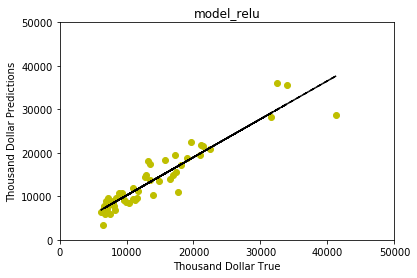

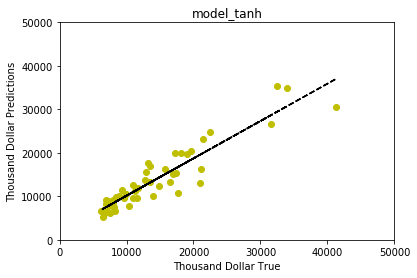

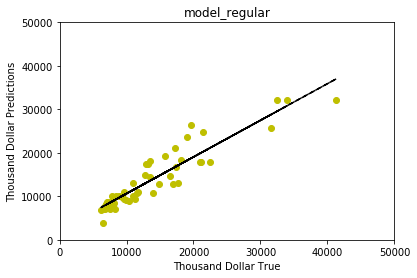

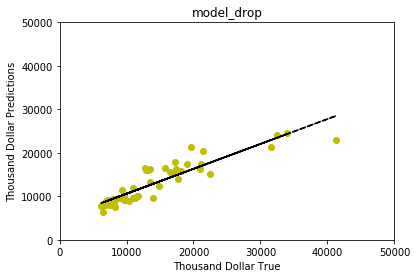

In [78]:
plot_list = []
for i,j in enumerate([model_relu, model_tanh, model_regular, model_drop]):
    list_name = ['model_relu', 'model_tanh', 'model_regular', 'model_drop']
    plot_list.append(plotting(j,list_name[i]))